<a href="https://colab.research.google.com/github/kang-narae/AI-DL-DA/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/%EC%9D%B4%EB%AF%B8%EC%A7%80%EB%B6%84%EB%A5%98_D(dense)NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import datasets
from keras.utils import np_utils

In [ ]:
(X_train, Y_train), (X_test, Y_test) = datasets.fashion_mnist.load_data()
print(X_train.shape, Y_train.shape)   #학습용 6만개
print(X_test.shape, Y_test.shape)   #검증용 만개로 애초에 잘려있음


#얘도 28x28임.

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
label = ['T-shirt', 'trouser', 'pullover', 'dress', 'coat',
         'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

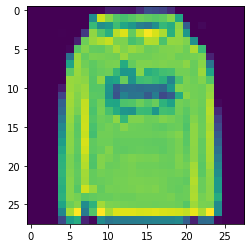

2
[[  0   0   0   0   0   0   0   0   0   2  20  20  13  12  31  60  55  49
   30   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 124 236 210 187 181 189 198 193 189 192
  208 153   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 173 126 136 176 151 135 109 100 126 170
  159 211  77   0   5   0   0   0   0   0]
 [  0   0   0   0   1   0   0  42 213 186 162 228 242 194 229 253 240 223
  162 214 136   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  22 199 216 225 233 205 206 181 190 226 225 183
  214 213 206 128   0   0   0   0   0   0]
 [  0   0   0   0   0   4 189 207 195 194 204 220 207 216 210 198 200 205
  206 208 199 223 174   0   0   0   0   0]
 [  0   0   0   0   0  95 216 195 204 203 201 200 216 200 200 200 203 204
  206 199 200 202 205  24   0   0   0   0]
 [  0   0   0   0   0 148 218 200 192 199 203 204 157 195 206 206 204 206
  204 204 211 197 210  99   0   0   0   0]
 [  0   0   0   0   0 191 216 206 191 196 199 170 135 137 209 

In [ ]:
my_sample = np.random.randint(60000)
plt.imshow(X_train[my_sample])   #원래모노칼라임. 단색만 가짐. 0~255까지 검정 흰색 사이의 범위.  camp='gray'넣으면 원본.
plt.show()
print(Y_train[my_sample])
print(X_train[my_sample])

In [ ]:
y_train = np_utils.to_categorical(Y_train)  #이러면 원핫인코딩 됨.
y_test= np_utils.to_categorical(Y_test)
print(Y_train[5000])
print(y_train[5000])

4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
x_train = X_train.reshape(-1, 28*28)
x_test = X_test.reshape(-1 , 28*28)
x_train = x_train/255    #민맥스 스케일링. 
x_test = x_test/ 255
print(x_train.shape)

(60000, 784)


In [ ]:
model= Sequential()
model.add(Dense(128, input_dim= 28*28, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer= 'adam', loss='categorical_crossentropy',
              metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
fit_hist = model.fit(x_train, y_train, batch_size= 128, epochs=15, validation_split=0.2, verbose=1)

Epoch 1/15
375/375 [==============================] - 3s 6ms/step - loss: 0.5697 - accuracy: 0.8022 - val_loss: 0.4308 - val_accuracy: 0.8493
Epoch 2/15
375/375 [==============================] - 2s 5ms/step - loss: 0.3977 - accuracy: 0.8571 - val_loss: 0.3717 - val_accuracy: 0.8684
Epoch 3/15
375/375 [==============================] - 2s 5ms/step - loss: 0.3579 - accuracy: 0.8699 - val_loss: 0.3794 - val_accuracy: 0.8593
Epoch 4/15
375/375 [==============================] - 2s 5ms/step - loss: 0.3283 - accuracy: 0.8801 - val_loss: 0.3463 - val_accuracy: 0.8767
Epoch 5/15
375/375 [==============================] - 2s 5ms/step - loss: 0.3109 - accuracy: 0.8857 - val_loss: 0.3771 - val_accuracy: 0.8641
Epoch 6/15
375/375 [==============================] - 2s 6ms/step - loss: 0.2975 - accuracy: 0.8898 - val_loss: 0.3437 - val_accuracy: 0.8765
Epoch 7/15
375/375 [==============================] - 2s 6ms/step - loss: 0.2787 - accuracy: 0.8971 - val_loss: 0.3272 - val_accuracy: 0.8832
Epoch 

In [ ]:
# 검증해보자

score= model.evaluate(x_test, y_test, verbose=0)
print('Final test set accuracy:', score[1])

Final test set accuracy: 0.8845000267028809


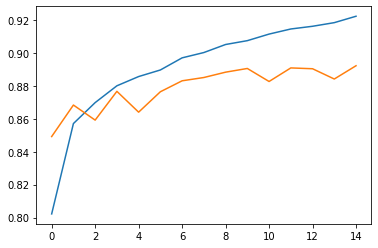

In [ ]:
plt.plot(fit_hist.history['accuracy'])
plt.plot(fit_hist.history['val_accuracy'])
plt.show()

bag
8
[[5.3186522e-09 1.1191260e-09 3.9552220e-10 3.6503002e-11 8.7098712e-08
  2.6345235e-11 6.5588984e-12 1.1311457e-09 9.9999988e-01 5.7672190e-14]]
8
bag


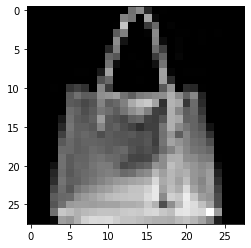

In [ ]:
my_sample=np.random.randint(10000)
plt.imshow(X_test[my_sample], cmap='gray')  #입력값
print(label[Y_test[my_sample]])
print(Y_test[my_sample])    #정답
pred= model.predict(x_test[my_sample].reshape(-1, 28*28)) #입력값으로 에측한 값
print(pred)
print(np.argmax(pred))
print(label[np.argmax(pred)])

In [ ]:


# 지금까지 한 건 그냥 NN. neural network.
#굳이 하나 더 붙이자면 dnn. dense neural network. 조밀하게 연결되어있는.  (용어 맞아? ,,,)

#앞으로 할 거는 cnn. convolutional(합성곱) nueral network. 이미지 분류에 특화됨.